<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# <center><b>Ensemble Learning - Part I<b></center>

---
<a name = Section2></a>
# **2. Problem Statement**
---

<center><img src="https://www.reno.gov/Home/ShowImage?id=7739&t=635620964226970000"></center>

**<h4>Scenario:</h4>**

- **Property Hall** is a Canadian **real estate** company that facilitates  a transaction between the buyers and sellers of property.

- The company's **revenue** is **down** for the past three months and they want to identify its root cause.

- They are looking for an **automatic way** to detect **unusual behavior** in their revenue.

- The company already has **access** to the **data** of **houses** in the city of Windsor.

- To identify unusual behavior, they have hired a team of data scientists. **Consider you are one of them...**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd  # Importing for panel data analysis
# from pandas_profiling import ProfileReport  
# Import Pandas Profiling (To generate Univariate Analysis)

pd.set_option('display.max_columns',
              None)  # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth',
              None)  # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows',
              None)  # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment',
              None)  # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x
              )  # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt  # Importing pyplot interface using matplotlib
import seaborn as sns  # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.feature_selection import SelectFromModel  
# To perform Feature Selection over model
from yellowbrick.model_selection import FeatureImportances  
# To retrieve Feature Importances over model
from sklearn.metrics import classification_report  
# To generate classification report of the model
from sklearn.metrics import plot_confusion_matrix  
# To plot confusion matrix of the model
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split  
# To perform train, test and split over the data
from sklearn.linear_model import LogisticRegression  
# To perform modeling using LogisticRegression
from sklearn.svm import SVC  # To perform modeling using SVC
from sklearn.tree import DecisionTreeClassifier  
# To perform modeling using DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
# To perform modeling using RandomForestClassifier
from sklearn.ensemble import VotingClassifier  # To perform modeling using VotingClassifier
from sklearn.ensemble import BaggingClassifier  
# To perform modeling using BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier  
# To perform modeling using AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier  
# To perform modeling using GradientBoostingClassifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings  # Importing warning to disable runtime warnings

warnings.filterwarnings("ignore")  # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset is based on **real estate** provided by Property Hall and it is accessible <a href="https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Housing.csv">**here**</a>.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 546 | 12 | 22 KB| 

</br>

| Id | Features | Description |
| :-- | :--| :--| 
|01|**price**|Sale price of a house.|
|02|**lotsize**|The lot size of a property in square feet.|
|03|**bedrooms**|Number of bedrooms.|
|04|**bathrms**|Number of bathrooms.|
|05|**stories**|Number of stories excluding basement.|
|06|**driveway**|Does the house has a driveway?|
|07|**recroom**|Does the house has a recreational room?|
|08|**fullbase**|Does the house has a full finished basement?|
|09|**gashw**|Does the house uses gas for hot water heating?|
|10|**airco**|Does the house has central air conditioning?|
|11|**garagepl**|Number of garage places.|
|12|**prefarea**|Is the house located in the preferred neighbourhood of the city?|

In [2]:
data = pd.read_csv(
    filepath_or_buffer=
    'https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Housing.csv'
)
print('Data Shape:', data.shape)
data.head()

Data Shape: (546, 12)


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.00,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.00,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.00,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.00,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.00,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
data.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.00,546.00,546.00,546.00,546.00,546.00
mean,68121.60,5150.27,2.97,1.29,1.81,0.69
std,26702.67,2168.16,0.74,0.50,0.87,0.86
min,25000.00,1650.00,1.00,1.00,1.00,0.00
25%,49125.00,3600.00,2.00,1.00,1.00,0.00
50%,62000.00,4600.00,3.00,1.00,2.00,0.00
75%,82000.00,6360.00,3.00,2.00,2.00,1.00
max,190000.00,16200.00,6.00,4.00,4.00,3.00


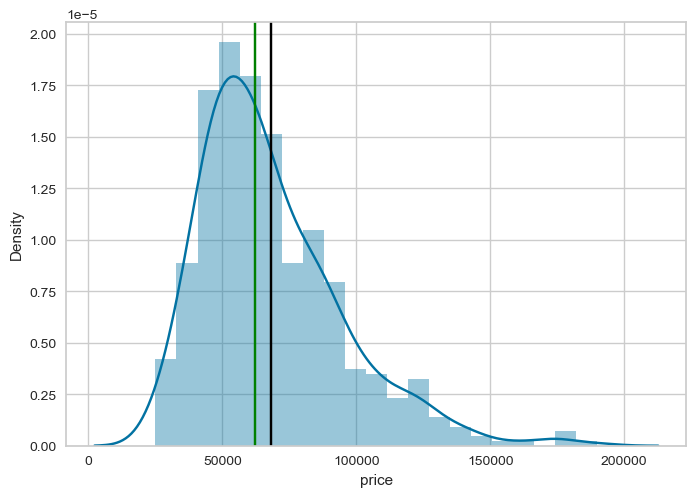

In [4]:
sns.distplot(data['price'])
plt.axvline(data.price.mean(), color='black')
plt.axvline(data.price.median(), color='green')
plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [6]:
data.shape

(546, 12)

In [7]:
data = data.drop_duplicates()
data.shape

(545, 12)

# EDA

### Lets try to figure out the asscociation of bedrooms, bathrooms, stories and garage places wrt price?

In [8]:
data.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [9]:
num_cols = ['bedrooms', 'bathrms', 'stories', 'garagepl']
num_cols

['bedrooms', 'bathrms', 'stories', 'garagepl']

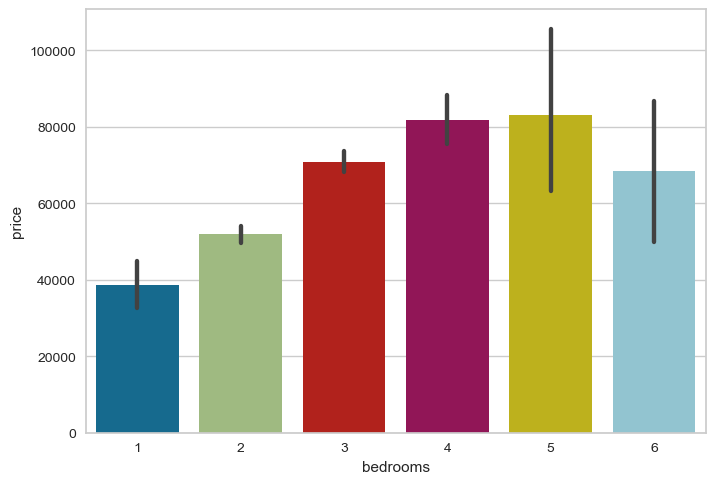

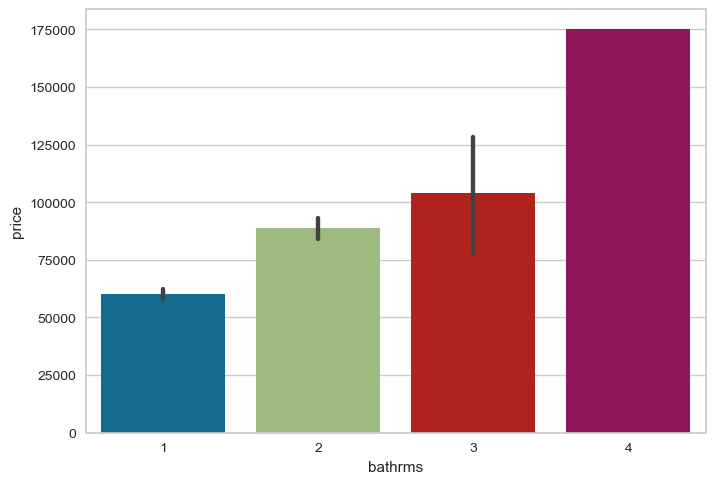

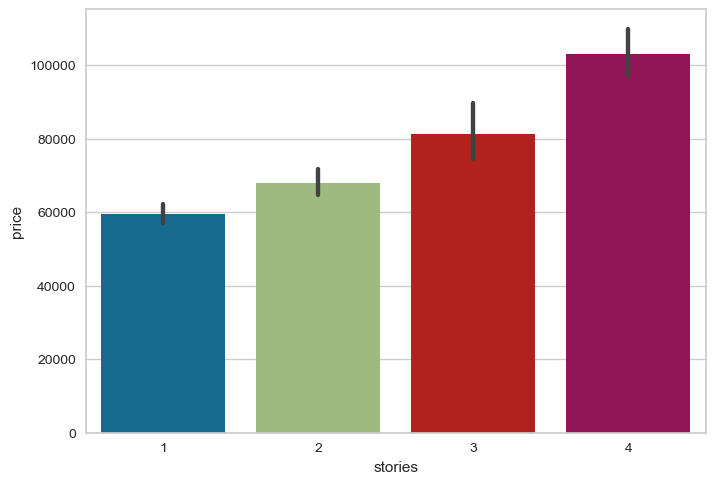

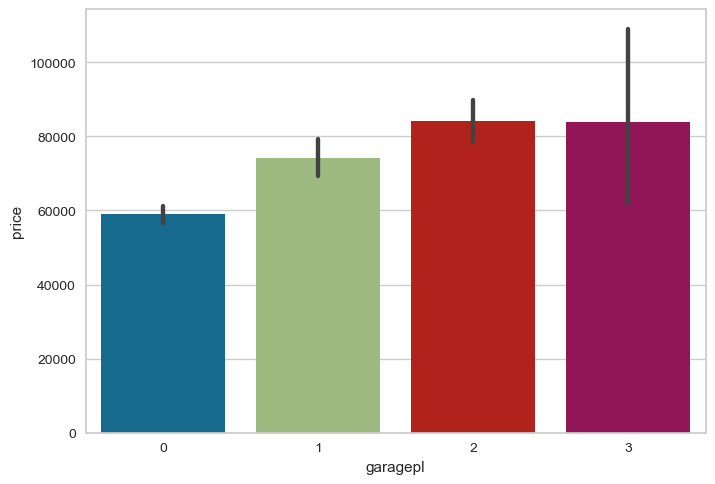

In [10]:
for c in num_cols:
    sns.barplot(x=data[c], y=data.price)
    plt.show()
    print("="*70)

In [11]:
data.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [12]:
data.head(2)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.00,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.00,4000,2,1,1,yes,no,no,no,no,0,no


In [13]:
cat_cols = ['driveway','recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
cat_cols

['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

In [14]:
for c in cat_cols:
    print(data[c].value_counts())
    print("."*70)
    print(data[c].value_counts(normalize=True)*100)
    print("="*70)

yes    468
no      77
Name: driveway, dtype: int64
......................................................................
yes   85.87
no    14.13
Name: driveway, dtype: float64
no     448
yes     97
Name: recroom, dtype: int64
......................................................................
no    82.20
yes   17.80
Name: recroom, dtype: float64
no     354
yes    191
Name: fullbase, dtype: int64
......................................................................
no    64.95
yes   35.05
Name: fullbase, dtype: float64
no     520
yes     25
Name: gashw, dtype: int64
......................................................................
no    95.41
yes    4.59
Name: gashw, dtype: float64
no     373
yes    172
Name: airco, dtype: int64
......................................................................
no    68.44
yes   31.56
Name: airco, dtype: float64
no     417
yes    128
Name: prefarea, dtype: int64
......................................................................
no    7

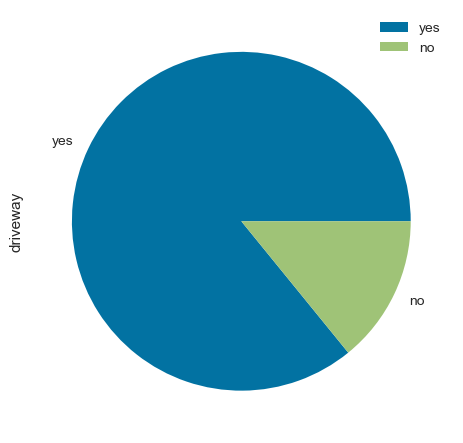

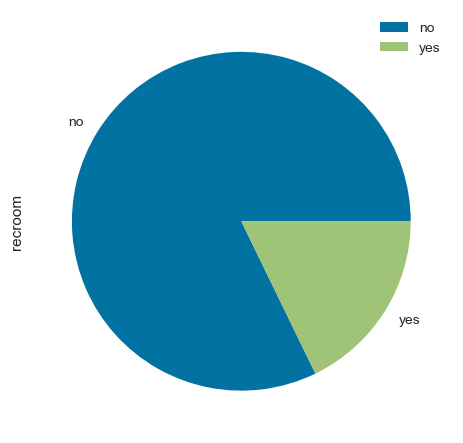

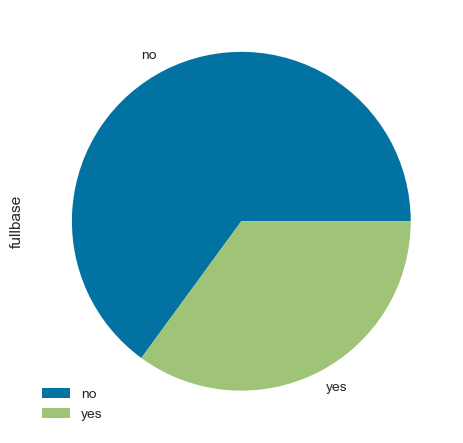

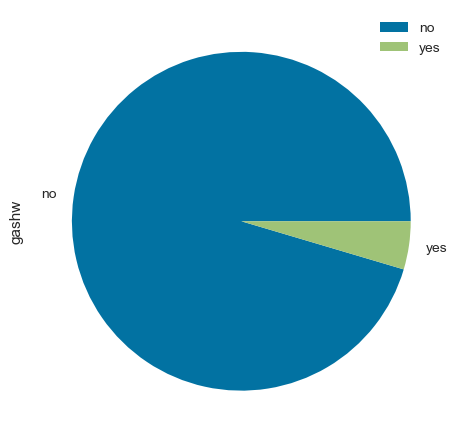

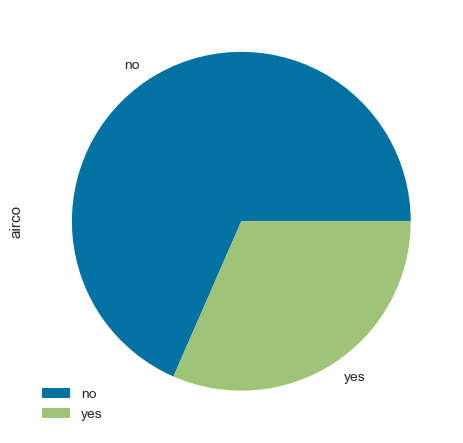

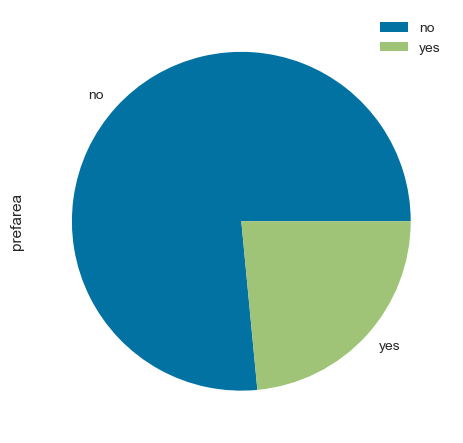

In [15]:
for c in cat_cols:
    data[c].value_counts().plot(kind='pie', legend=True)
    plt.show()
    print("="*70)

In [16]:
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.00,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.00,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.00,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.00,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.00,6360,2,1,1,yes,no,no,no,no,0,no


In [17]:
ohe_cols = ['driveway','recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
ohe_cols

['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

In [18]:
data = pd.get_dummies(data, columns=ohe_cols, drop_first=True)
data.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000.00,5850,3,1,2,1,1,0,1,0,0,0
1,38500.00,4000,2,1,1,0,1,0,0,0,0,0
2,49500.00,3060,3,1,1,0,1,0,0,0,0,0
3,60500.00,6650,3,1,2,0,1,1,0,0,0,0
4,61000.00,6360,2,1,1,0,1,0,0,0,0,0


In [19]:
data.shape

(545, 12)

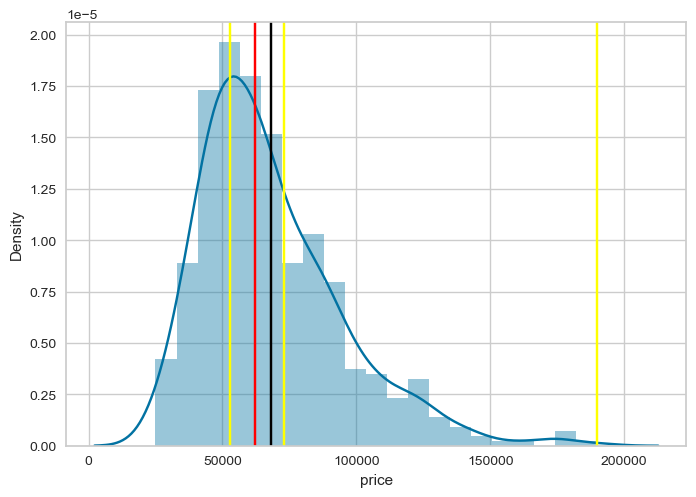

In [20]:
sns.distplot(data['price'])
plt.axvline(data.price.mean(), color='black')
plt.axvline(data.price.quantile(0.33), color='yellow')
plt.axvline(data.price.quantile(0.66), color='yellow')
plt.axvline(data.price.quantile(1.0), color='yellow')
plt.axvline(data.price.median(), color='red')
plt.show()

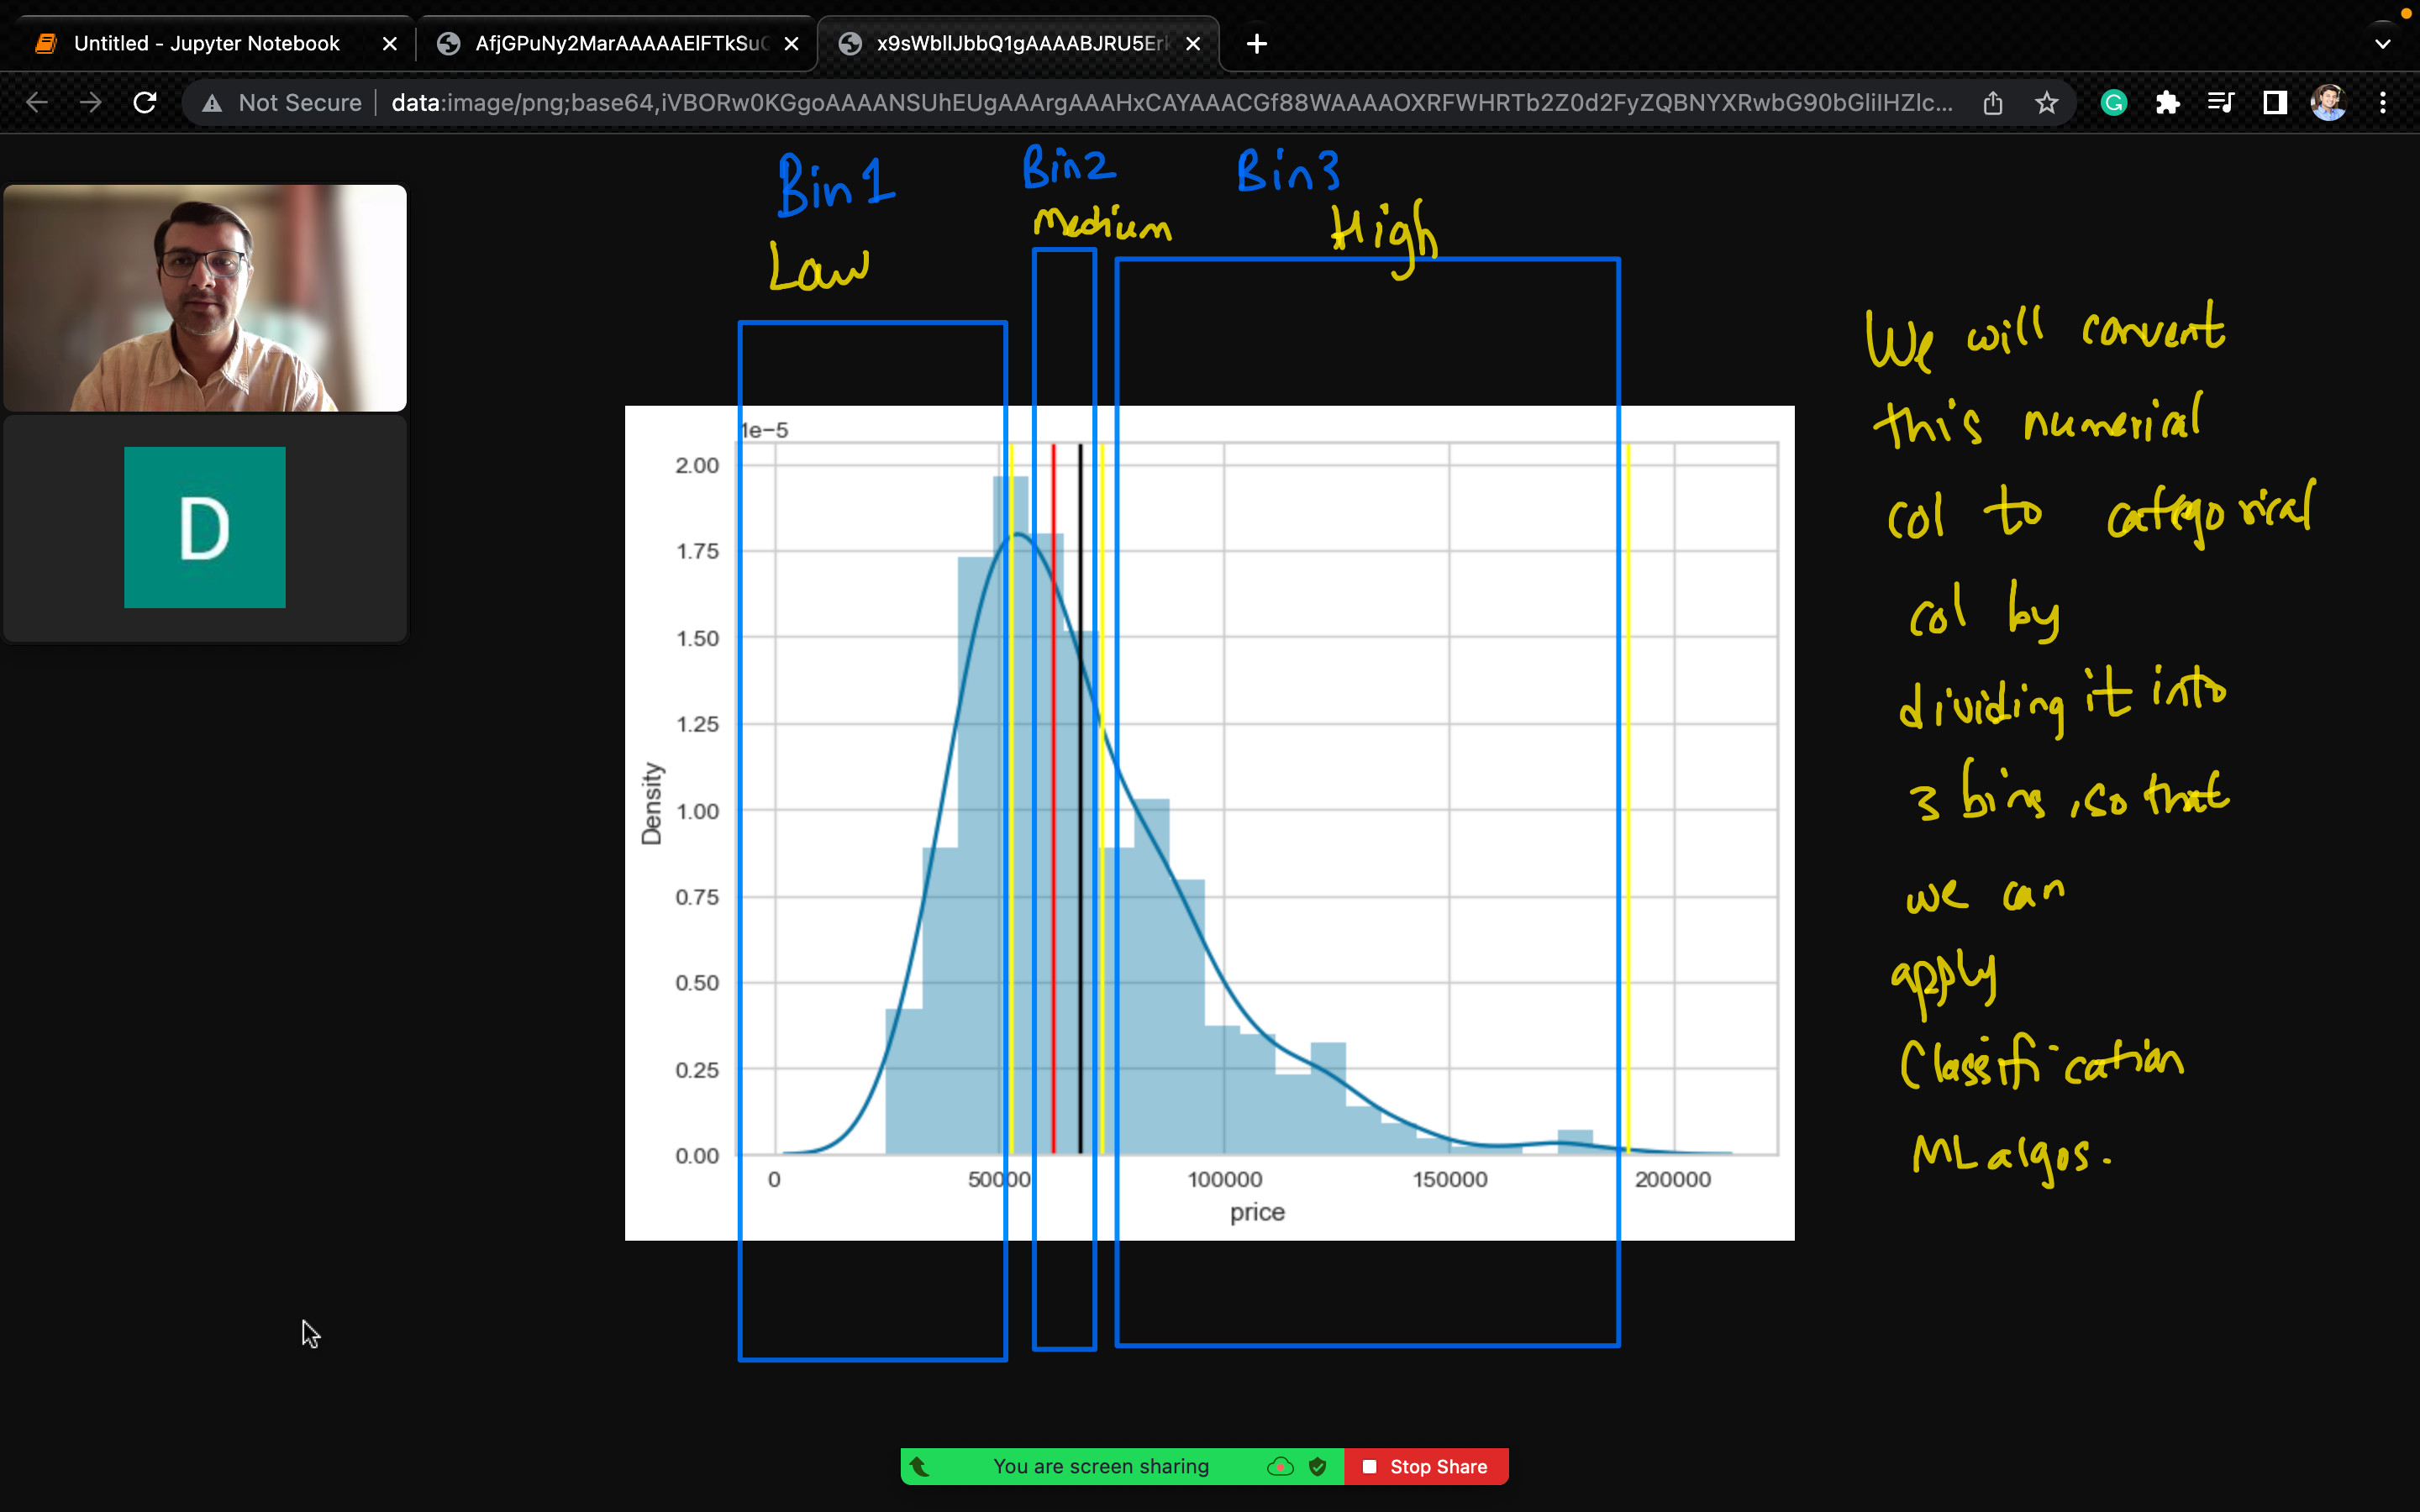

In [21]:
q1 = data.price.quantile(0.33)
q2 = data.price.quantile(0.66)
q3 = data.price.quantile(1.)
print(q1, q2, q3)

52900.0 73000.0 190000.0


In [22]:
data['price_cut'] = pd.cut(data.price, bins=[0,q1,q2,q3], labels=['Low','Medium','High'])
data.price_cut.value_counts()

High      184
Low       181
Medium    180
Name: price_cut, dtype: int64

In [23]:
data.head(2)

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes,price_cut
0,42000.00,5850,3,1,2,1,1,0,1,0,0,0,Low
1,38500.00,4000,2,1,1,0,1,0,0,0,0,0,Low


In [24]:
data.drop(['price'], axis=1, inplace=True)
data.head(2)

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes,price_cut
0,5850,3,1,2,1,1,0,1,0,0,0,Low
1,4000,2,1,1,0,1,0,0,0,0,0,Low


In [25]:
X = data.drop('price_cut', axis=1)
y = data.price_cut

In [26]:
X.head(1)

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,5850,3,1,2,1,1,0,1,0,0,0


In [27]:
data.shape

(545, 12)

## Feature Selection

https://www.datatechnotes.com/2021/04/selectfrommodel-feature-selection.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

est = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
selector = SelectFromModel(estimator=est)
selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=42))

In [29]:
selector.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False, False])

In [30]:
X.columns

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway_yes',
       'recroom_yes', 'fullbase_yes', 'gashw_yes', 'airco_yes',
       'prefarea_yes'],
      dtype='object')

In [31]:
X.columns[selector.get_support()]

Index(['lotsize', 'bathrms'], dtype='object')

In [32]:
selected_features = X.columns[selector.get_support()].to_list()
selected_features

['lotsize', 'bathrms']

In [33]:
selector.threshold_

0.09090909090909091

In [34]:
selector.estimator

RandomForestClassifier(n_jobs=-1, random_state=42)

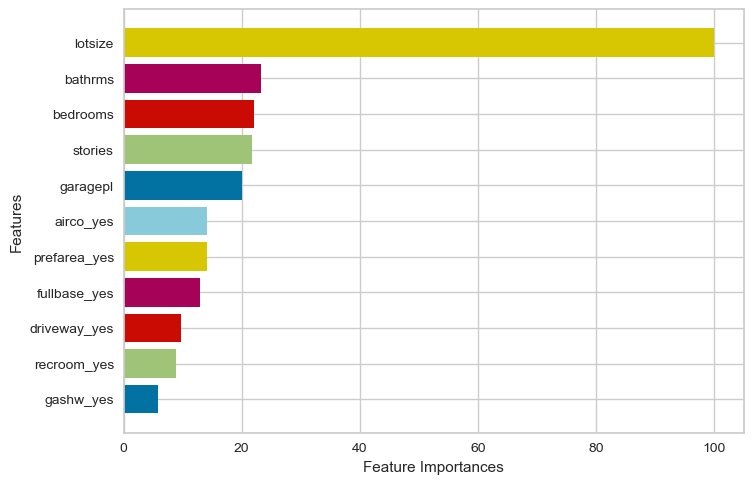

In [35]:
from yellowbrick.model_selection import FeatureImportances

fi = FeatureImportances(selector.estimator)
fi.fit(X, y)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

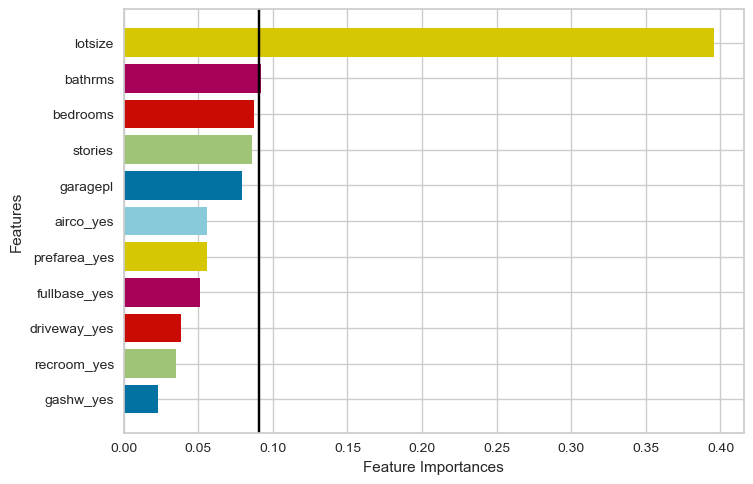

In [36]:
from yellowbrick.model_selection import FeatureImportances

fi = FeatureImportances(selector.estimator, relative=False)
fi.fit(X, y)
plt.axvline(selector.threshold_, color='black')
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

# Research on RFE

https://towardsdatascience.com/5-feature-selection-method-from-scikit-learn-you-should-know-ed4d116e4172

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [38]:
rfe_selector = RFE(estimator=LogisticRegression(),
                   n_features_to_select = 2, 
                   step = 1)
rfe_selector.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=2)

In [39]:
rfe_selector.get_support()

array([False, False,  True, False, False,  True, False, False, False,
       False, False])

In [40]:
X.columns

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway_yes',
       'recroom_yes', 'fullbase_yes', 'gashw_yes', 'airco_yes',
       'prefarea_yes'],
      dtype='object')

In [41]:
rfe_selector.support_

array([False, False,  True, False, False,  True, False, False, False,
       False, False])

In [42]:
rfe_selector.ranking_

array([10,  6,  1,  8,  7,  1,  5,  9,  4,  2,  3])

In [43]:
list(X.columns)

['lotsize',
 'bedrooms',
 'bathrms',
 'stories',
 'garagepl',
 'driveway_yes',
 'recroom_yes',
 'fullbase_yes',
 'gashw_yes',
 'airco_yes',
 'prefarea_yes']

In [44]:
selected_features_rfe = X.columns[rfe_selector.support_].to_list()
selected_features_rfe

['bathrms', 'driveway_yes']

In [45]:
X.shape

(545, 11)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 11), (109, 11), (436,), (109,))

## Voting Classifier

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier

In [50]:
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
svc = SVC(random_state=42, class_weight='balanced', probability=True)

In [51]:
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')
bag_clf = BaggingClassifier(base_estimator=dtc, n_estimators=500, n_jobs=-1, random_state=42)

In [52]:
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42, class_weight='balanced')

In [53]:
est = [('lr', log_reg), ('svc', svc), ('dt', dtc), ('rf', rfc)]
vc = VotingClassifier(estimators=est, voting='soft')

In [54]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(base_estimator=dtc, n_estimators=500, random_state=42)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=500, random_state=42)

In [56]:
%%time

# Classifier List
clf_list = [log_reg, svc, dtc, bag_clf, vc, rfc, ada_clf, gb_clf]
clf_list

CPU times: user 10 µs, sys: 1e+03 ns, total: 11 µs
Wall time: 13.1 µs


[LogisticRegression(class_weight='balanced', random_state=42),
 SVC(class_weight='balanced', probability=True, random_state=42),
 DecisionTreeClassifier(class_weight='balanced', random_state=42),
 BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         random_state=42),
                   n_estimators=500, n_jobs=-1, random_state=42),
 VotingClassifier(estimators=[('lr',
                               LogisticRegression(class_weight='balanced',
                                                  random_state=42)),
                              ('svc',
                               SVC(class_weight='balanced', probability=True,
                                   random_state=42)),
                              ('dt',
                               DecisionTreeClassifier(class_weight='balanced',
                                                      random_state=42)),
                              ('rf',
    

In [57]:


for clf in clf_list:
    clf.fit(X_train, y_train)
    
    a = clf.score(X_train, y_train)
    b = clf.score(X_test, y_test)
    c = clf.__class__.__name__
    print("Classifier Name:",c)
    print("Train score:",a)
    print("Test score:",b)
    print("="*70)
    

Classifier Name: LogisticRegression
Train score: 0.6169724770642202
Test score: 0.5504587155963303
Classifier Name: SVC
Train score: 0.5688073394495413
Test score: 0.5412844036697247
Classifier Name: DecisionTreeClassifier
Train score: 0.9931192660550459
Test score: 0.6697247706422018
Classifier Name: BaggingClassifier
Train score: 0.9931192660550459
Test score: 0.6422018348623854
Classifier Name: VotingClassifier
Train score: 0.9908256880733946
Test score: 0.6605504587155964
Classifier Name: RandomForestClassifier
Train score: 0.9931192660550459
Test score: 0.5779816513761468
Classifier Name: AdaBoostClassifier
Train score: 0.9931192660550459
Test score: 0.5963302752293578
Classifier Name: GradientBoostingClassifier
Train score: 0.9908256880733946
Test score: 0.5871559633027523


# Stacking

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
%%time

est = [
    ('logistic', LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1)),
    ('svc', SVC(class_weight='balanced', random_state=42, probability=True)),
    ('knn', KNeighborsClassifier(n_jobs=-1)),
    ('randomforest', RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)),
]

est

CPU times: user 69 µs, sys: 45 µs, total: 114 µs
Wall time: 119 µs


[('logistic',
  LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=42)),
 ('svc', SVC(class_weight='balanced', probability=True, random_state=42)),
 ('knn', KNeighborsClassifier(n_jobs=-1)),
 ('randomforest',
  RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42))]

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
from sklearn.ensemble import StackingClassifier

stack_clf = StackingClassifier(estimators=est,
            final_estimator=GradientBoostingClassifier(random_state=42), 
                               n_jobs=-1, 
                               cv=5)

stack_clf.fit(X_train, y_train)

a = stack_clf.score(X_train, y_train)
b = stack_clf.score(X_test, y_test)
c = stack_clf.__class__.__name__
print("Classifier Name:",c)
print("Train score:",a)
print("Test score:",b)

/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Classifier Name: StackingClassifier
Train score: 0.9174311926605505
Test score: 0.6146788990825688


## 2nd Try

In [62]:
%%time

est = [
    ('dtc1', DecisionTreeClassifier(criterion='entropy', random_state=42)),
    ('dtc2', DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)),
    ('dtc3', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)),
    ('svc', SVC(class_weight='balanced', random_state=42, probability=True)),
    ('knn', KNeighborsClassifier(n_jobs=-1)),
    ('randomforest1', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('randomforest2', RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=42)),
    ('randomforest3', RandomForestClassifier(n_estimators=30, class_weight='balanced', random_state=42)),
    ('randomforest4', RandomForestClassifier(max_depth=4, class_weight='balanced', random_state=42))
]

est

CPU times: user 74 µs, sys: 2 µs, total: 76 µs
Wall time: 77.7 µs


[('dtc1', DecisionTreeClassifier(criterion='entropy', random_state=42)),
 ('dtc2',
  DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)),
 ('dtc3', DecisionTreeClassifier(max_depth=3, random_state=42)),
 ('svc', SVC(class_weight='balanced', probability=True, random_state=42)),
 ('knn', KNeighborsClassifier(n_jobs=-1)),
 ('randomforest1',
  RandomForestClassifier(class_weight='balanced', random_state=42)),
 ('randomforest2',
  RandomForestClassifier(class_weight='balanced', n_estimators=1000,
                         random_state=42)),
 ('randomforest3',
  RandomForestClassifier(class_weight='balanced', n_estimators=30,
                         random_state=42)),
 ('randomforest4',
  RandomForestClassifier(class_weight='balanced', max_depth=4, random_state=42))]

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
from sklearn.ensemble import StackingClassifier

stack_clf = StackingClassifier(estimators=est,
            final_estimator=GradientBoostingClassifier(random_state=42), 
                               n_jobs=-1, 
                               cv=5)

stack_clf.fit(X_train, y_train)

a = stack_clf.score(X_train, y_train)
b = stack_clf.score(X_test, y_test)
c = stack_clf.__class__.__name__
print("Classifier Name:",c)
print("Train score:",a)
print("Test score:",b)

Classifier Name: StackingClassifier
Train score: 0.8211009174311926
Test score: 0.6513761467889908


## 3rd Try

In [65]:
%%time

est = [
    ('dtc1', DecisionTreeClassifier(criterion='entropy', random_state=42)),
    ('dtc2', DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)),
    ('dtc3', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)),
    ('svc', SVC(class_weight='balanced', random_state=42, probability=True)),
    ('knn', KNeighborsClassifier(n_jobs=-1)),
    ('randomforest1', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('randomforest2', RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=42)),
    ('randomforest3', RandomForestClassifier(n_estimators=30, class_weight='balanced', random_state=42)),
    ('randomforest4', RandomForestClassifier(max_depth=4, class_weight='balanced', random_state=42))
]

CPU times: user 69 µs, sys: 1 µs, total: 70 µs
Wall time: 71.8 µs


In [66]:
from catboost import CatBoostClassifier

In [67]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
from sklearn.ensemble import StackingClassifier

stack_clf = StackingClassifier(estimators=est,
            final_estimator=CatBoostClassifier(random_state=42), 
                               n_jobs=-1, 
                               cv=5)

stack_clf.fit(X_train, y_train)

a = stack_clf.score(X_train, y_train)
b = stack_clf.score(X_test, y_test)
c = stack_clf.__class__.__name__
print("Classifier Name:",c)
print("Train score:",a)
print("Test score:",b)

Learning rate set to 0.075847
0:	learn: 1.0473907	total: 64ms	remaining: 1m 3s
1:	learn: 1.0038344	total: 65.6ms	remaining: 32.7s
2:	learn: 0.9725922	total: 67.1ms	remaining: 22.3s
3:	learn: 0.9376064	total: 68.6ms	remaining: 17.1s
4:	learn: 0.9059332	total: 70ms	remaining: 13.9s
5:	learn: 0.8795717	total: 71.5ms	remaining: 11.8s
6:	learn: 0.8590491	total: 73.1ms	remaining: 10.4s
7:	learn: 0.8397558	total: 75.4ms	remaining: 9.35s
8:	learn: 0.8178293	total: 77ms	remaining: 8.48s
9:	learn: 0.8000947	total: 79.4ms	remaining: 7.86s
10:	learn: 0.7828321	total: 81ms	remaining: 7.28s
11:	learn: 0.7675991	total: 82.6ms	remaining: 6.8s
12:	learn: 0.7528492	total: 85.3ms	remaining: 6.48s
13:	learn: 0.7370286	total: 86.9ms	remaining: 6.12s
14:	learn: 0.7259733	total: 88.8ms	remaining: 5.83s
15:	learn: 0.7142160	total: 90.9ms	remaining: 5.59s
16:	learn: 0.7024925	total: 92.7ms	remaining: 5.36s
17:	learn: 0.6924785	total: 94.4ms	remaining: 5.15s
18:	learn: 0.6825852	total: 96.1ms	remaining: 4.96s
1

# 4rh Try

In [69]:
%%time
# Creating a collection of estimators
estimators = [('logistic', LogisticRegression(class_weight='balanced', 
                                              random_state=42, n_jobs=-1)), 
              ('svc', SVC(class_weight='balanced', random_state=42, 
                          probability=True)),
              ('knn', KNeighborsClassifier(n_neighbors=5 ,n_jobs=-1)),
              ('randomforest', RandomForestClassifier(class_weight='balanced', 
                                                      max_depth=2, n_jobs=-1, 
                                                      random_state=42))]

# Setting StackingClassifier with initiated estimators and a final estimator
stack_clf = StackingClassifier(estimators=estimators, 
                               final_estimator=GradientBoostingClassifier(random_state=42), 
                               n_jobs=-1, cv=5)
stack_clf.fit(X_train, y_train)

# Display the accuracy on train data and test data
print('Accuracy on Train data:', np.round(a=stack_clf.score(X_train, y_train), decimals=2))
print('Accuracy on Test data:', np.round(a=stack_clf.score(X_test, y_test), decimals=2))

/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Accuracy on Train data: 0.74
Accuracy on Test data: 0.61
CPU times: user 402 ms, sys: 16.9 ms, total: 419 ms
Wall time: 1.08 s


# 5th Try

In [70]:
%%time
# Creating a collection of estimators
estimators = [('logistic', LogisticRegression(class_weight='balanced', 
                                              random_state=42, n_jobs=-1)), 
              ('svc', SVC(class_weight='balanced', random_state=42, 
                          probability=True)),
              ('knn', KNeighborsClassifier(n_jobs=-1)),
              ('randomforest', RandomForestClassifier(class_weight='balanced', 
                                                      max_depth=2, n_jobs=-1, random_state=42))]

# Setting StackingClassifier with initiated estimators and a final estimator
stack_clf = StackingClassifier(estimators=estimators, 
                               final_estimator=GradientBoostingClassifier(random_state=42), 
                               n_jobs=-1, cv=5)
stack_clf.fit(X_train, y_train)

# Display the accuracy on train data and test data
print('Accuracy on Train data:', np.round(a=stack_clf.score(X_train, y_train), decimals=2))
print('Accuracy on Test data:', np.round(a=stack_clf.score(X_test, y_test), decimals=2))

/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Accuracy on Train data: 0.73
Accuracy on Test data: 0.59
CPU times: user 404 ms, sys: 11.6 ms, total: 416 ms
Wall time: 980 ms


# 6th Try

In [71]:
%%time
# Creating a collection of estimators
estimators = [('logistic', LogisticRegression(class_weight='balanced', 
                                              random_state=42, n_jobs=-1)), 
              ('svc', SVC(class_weight='balanced', random_state=42, 
                          probability=True)),
              ('knn', KNeighborsClassifier(n_jobs=-1)),
              ('randomforest', RandomForestClassifier(class_weight='balanced', 
                                                      max_depth=5, n_jobs=-1, random_state=42))]

# Setting StackingClassifier with initiated estimators and a final estimator
stack_clf = StackingClassifier(estimators=estimators, 
                               final_estimator=GradientBoostingClassifier(random_state=42), 
                               n_jobs=-1, cv=5)
stack_clf.fit(X_train, y_train)

# Display the accuracy on train data and test data
print('Accuracy on Train data:', np.round(a=stack_clf.score(X_train, y_train), decimals=2))
print('Accuracy on Test data:', np.round(a=stack_clf.score(X_test, y_test), decimals=2))

/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Accuracy on Train data: 0.75
Accuracy on Test data: 0.6
CPU times: user 402 ms, sys: 12 ms, total: 413 ms
Wall time: 1.03 s


# 7th Try

In [72]:

%%time
# Creating a collection of estimators
estimators = [('logistic', LogisticRegression(class_weight='balanced', 
                                              random_state=42, n_jobs=-1)), 
              ('svc', SVC(class_weight='balanced', random_state=42, probability=True)),
              ('knn', KNeighborsClassifier(n_jobs=-1)),
              ('randomforest', RandomForestClassifier(class_weight='balanced', 
                                                      max_depth=3, n_jobs=-1, 
                                                      random_state=42))]

# Setting StackingClassifier with initiated estimators and a final estimator
stack_clf = StackingClassifier(estimators=estimators, 
                               final_estimator=GradientBoostingClassifier(random_state=42), 
                               n_jobs=-1, cv=5)
stack_clf.fit(X_train, y_train)

# Display the accuracy on train data and test data
print('Accuracy on Train data:', np.round(a=stack_clf.score(X_train, y_train), decimals=2))
print('Accuracy on Test data:', np.round(a=stack_clf.score(X_test, y_test), decimals=2))

/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Accuracy on Train data: 0.74
Accuracy on Test data: 0.61
CPU times: user 400 ms, sys: 10.9 ms, total: 411 ms
Wall time: 1.03 s


# 8th Try

### GridSearchCV

In [75]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
model

DecisionTreeClassifier(random_state=0)

In [76]:
hp_to_be_tuned = {
    "criterion" : ["gini","entropy"],
    "max_depth" : [1,2,3,4,5,None]
}

In [77]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid=hp_to_be_tuned, cv=10, n_jobs=-1, verbose=True)

In [78]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None]},
             verbose=True)

In [79]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [80]:
grid.best_score_

0.6099894291754757

In [81]:
y_pred_test = grid.predict(X_test)

y_pred_train = grid.predict(X_train)

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
# Training Acc
accuracy_score(y_train, y_pred_train)

0.6628440366972477

In [85]:
# Testing Acc
accuracy_score(y_test, y_pred_test)

0.6146788990825688

# 9th Try

In [86]:
hp_to_be_tuned2 = {
    "criterion" : ["gini","entropy"],
    "max_depth" : [1,2,3,4,5,6,7,None],
    "min_samples_split" : [1,2,3,4,5,6,7,None],
    "min_samples_leaf" : [1,2,3,4,5,6,7,None]
}

In [87]:
from sklearn.model_selection import RandomizedSearchCV
grid2 = RandomizedSearchCV(model, n_iter=50, param_distributions=hp_to_be_tuned2, cv=10, n_jobs=-1, verbose=True)

In [88]:
grid2.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-pac

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7,
                                                      None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, None],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, None]},
                   verbose=True)

In [89]:
grid2.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 6,
 'max_depth': None,
 'criterion': 'gini'}

In [90]:
grid2.best_score_

0.6101479915433403

In [91]:
y_pred_test = grid2.predict(X_test)

y_pred_train = grid2.predict(X_train)

In [92]:
# Training Acc
accuracy_score(y_train, y_pred_train)

0.7729357798165137

In [93]:
# Testing Acc
accuracy_score(y_test, y_pred_test)

0.6146788990825688

# 10th Try

## Last one from my side :)

In [94]:
hp_to_be_tuned2 = {
    "n_estimators" : [20,30,40,50,60,70,80,90,100,110,120,130,140,150,200,250],
    "criterion" : ["gini","entropy"],
    "max_depth" : [1,2,3,4,5,6,7,None],
    "min_samples_split" : [1,2,3,4,5,6,7,None],
    "min_samples_leaf" : [1,2,3,4,5,6,7,None]
}

In [95]:
from sklearn.model_selection import RandomizedSearchCV
grid2 = RandomizedSearchCV(rfc, n_iter=100, param_distributions=hp_to_be_tuned2, cv=10, n_jobs=-1, verbose=True)

In [96]:
grid2.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1056, in __call__
    self.retrieve()
  File "/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 935, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/ingledarshan/opt/anaconda3/lib/python3.9/mu

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_estimators=500, n_jobs=-1,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7,
                                                      None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, None],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, None],
                                        'n_estimators': [20, 30, 40, 50, 60, 70,
                                                         80, 90, 100, 110, 120,
                               

In [97]:
grid2.best_params_

{'n_estimators': 250,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_depth': 7,
 'criterion': 'entropy'}

In [98]:
grid2.best_score_

0.7131078224101481

In [100]:
y_pred_test = grid2.predict(X_test)

y_pred_train = grid2.predict(X_train)

In [101]:
# Training Acc
accuracy_score(y_train, y_pred_train)

0.8509174311926605

In [102]:
# Testing Acc
accuracy_score(y_test, y_pred_test)

0.6146788990825688

# Happy Learning